In [1]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image, ImageDraw
from shapely.geometry import Polygon
from ultralytics import YOLO

In [41]:
def get_list_from_xywh(bb:list):
    return [[int(bb[0]), int(bb[1])],
            [int(bb[2]), int(bb[1])],
            [int(bb[0]), int(bb[3])],
            [int(bb[2]), int(bb[3])]]

def format_swap(bbx:list):
    bbx_1 = get_list_from_xywh(bbx)
    bbx_1_tmp = bbx_1[-1]
    bbx_1[-1] = bbx_1[-2]
    bbx_1[-2] = bbx_1_tmp
    return bbx_1


def calculate_int(human: list, zone: list, draw=False):
    square = (human[2] - human[0]) * (human[3] - human[1])
    # Человека перевожим в координаты
    human = format_swap(human) # Пусть это будет человек
    # Зону просто парсим

    poly_1 = Polygon(human)
    poly_2 = Polygon(zone)
    # print("Процент вхождения человека в зону")
    if draw:
      plt.plot(*poly_1.exterior.xy)
      plt.plot(*poly_2.exterior.xy)
    return (poly_1.intersection(poly_2).area / square) * 100


def draw_by_points(img, zone: list, color=(255, 0, 0),
                   thick=5):
  zone.append(zone[0])
  for p in range(len(zone) - 1):
    cv2.line(img,
             (zone[p][0], zone[p][1]),
             (zone[p + 1][0], zone[p + 1][1]),
             color,
             thick)

  return img

In [72]:
model = YOLO("runs/detect/train22/weights/best.pt")
# model = YOLO("detect/train2/weights/best.pt")
image_file = r"D:\Study\Hack_10.11.2023\cameras\DpR-Csp-uipv-ShV-V1\1a16321d-4371-4721-bbc9-ccfc4a17687c.jpg"
a = model(image_file)
a
if a[0].boxes.xyxy.tolist():
    humans = a[0].boxes.xyxy.tolist()
else:
    humans = []

print(humans)


image 1/1 D:\Study\Hack_10.11.2023\cameras\DpR-Csp-uipv-ShV-V1\1a16321d-4371-4721-bbc9-ccfc4a17687c.jpg: 384x640 2 persons, 287.6ms
Speed: 4.0ms preprocess, 287.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


[[772.1956787109375, 305.4487609863281, 916.7852783203125, 523.6453857421875], [1459.5400390625, 296.6908264160156, 1559.41455078125, 436.5301208496094]]


In [65]:
a[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8319])
data: tensor([[7.4353e+02, 4.1552e+02, 9.5405e+02, 9.7239e+02, 8.3189e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[848.7907, 693.9530, 210.5215, 556.8675]])
xywhn: tensor([[0.4421, 0.6425, 0.1096, 0.5156]])
xyxy: tensor([[743.5300, 415.5192, 954.0515, 972.3867]])
xyxyn: tensor([[0.3873, 0.3847, 0.4969, 0.9004]])

In [61]:
import os

arr = image_file.split("\\")

cameras_index = arr.index("cameras")
dir_path = image_file.split("cameras")[0]


zone_path = os.path.join(dir_path, "danger_zones", f"danger_{arr[cameras_index+1]}.txt")

zone = []
with open(zone_path) as file:
    for line in file:      
        string = line.replace(",", "")
        string = string.replace("[", "")
        string = string.replace("]", "")
        string = string.strip()
        zone.append([int(string.split(" ")[0]), int(string.split(" ")[1])])
zone

[[1036, 831], [480, 475], [614, 421], [1171, 691]]

In [73]:
humans

[[772.1956787109375, 305.4487609863281, 916.7852783203125, 523.6453857421875],
 [1459.5400390625, 296.6908264160156, 1559.41455078125, 436.5301208496094]]

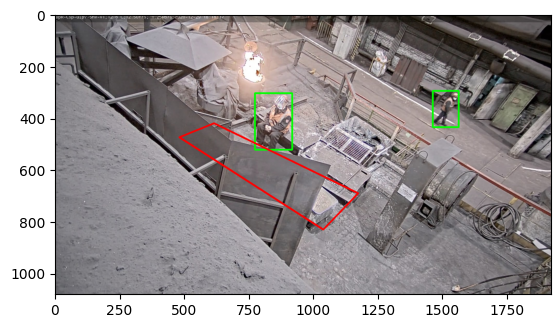

In [75]:
import cv2
import matplotlib.pyplot as plt

b = cv2.imread(image_file)
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

for i in humans:
    b = cv2.rectangle(b, (int(i[0]), int(i[1])), (int(i[2]), int(i[3])), (0, 255, 0), 5)
b = draw_by_points(b, zone)
plt.imshow(b);


'Процент вхождения человека в зону: 0.0%'

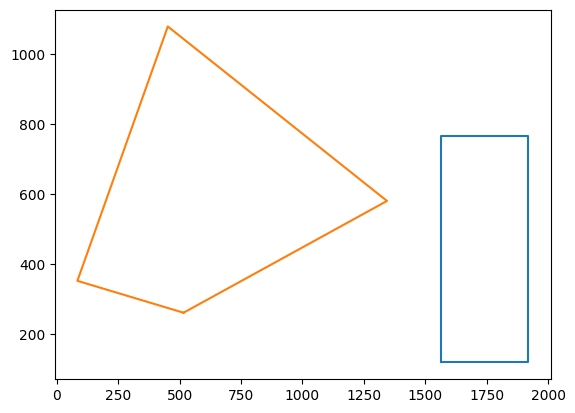

In [50]:
f"Процент вхождения человека в зону: {round(calculate_int(human, zone, draw=True), 2)}%"